<a href="https://colab.research.google.com/github/bamboo0727/Neural-Network-Model/blob/master/Autoencoder(stacked_vs_Cnn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Autoencoder
### Directives
* Create the autoencoders described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras
* Plot the model loss over time

### Autoencoders to build
1. Stacked
2. Convolutional Encoder

#### Don't worry if the data you generate looks bad. This is just an exercise, we can't really measure performance on an unsupervised task

In [0]:
from keras.datasets import fashion_mnist

from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot


print(tf.__version__)
(X_train, train_label), (X_test, test_label) = fashion_mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape

1.13.1


(70000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])

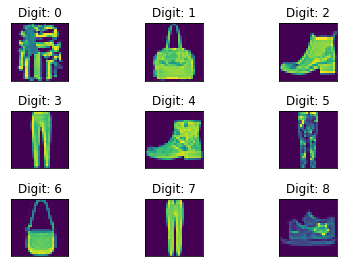

In [0]:
print_first_9(all_data[-9:])

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

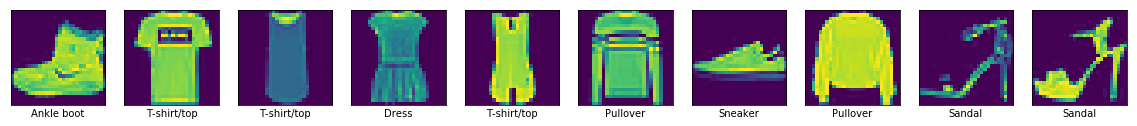

In [0]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[train_label[i]])

plt.show()


In [0]:

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:

history=model.fit(X_train, train_label, epochs=100,batch_size=64,validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, test_label)

print('Test accuracy:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 78us/step - loss: 0.5961 - acc: 0.7894 - val_loss: 0.4509 - val_acc: 0.8359
Epoch 2/100
48000/48000 [==============================] - 2s 52us/step - loss: 0.4325 - acc: 0.8461 - val_loss: 0.3961 - val_acc: 0.8578
Epoch 3/100
48000/48000 [==============================] - 3s 52us/step - loss: 0.3936 - acc: 0.8600 - val_loss: 0.3644 - val_acc: 0.8694
Epoch 4/100
48000/48000 [==============================] - 3s 55us/step - loss: 0.3693 - acc: 0.8669 - val_loss: 0.3566 - val_acc: 0.8711
Epoch 5/100
48000/48000 [==============================] - 3s 59us/step - loss: 0.3503 - acc: 0.8733 - val_loss: 0.3470 - val_acc: 0.8744
Epoch 6/100
48000/48000 [==============================] - 3s 59us/step - loss: 0.3372 - acc: 0.8769 - val_loss: 0.3314 - val_acc: 0.8798
Epoch 7/100
48000/48000 [==============================] - 3s 60us/step - loss: 0.3256 - acc: 0.8812 - val_loss: 0.3371 - 

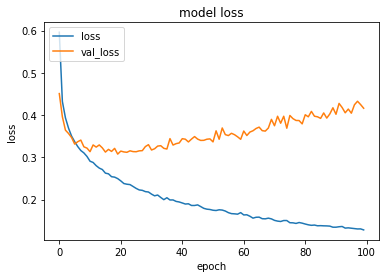

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:
encoder = Model(input=input_img, output=encoded)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [0]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape )
print (X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# training
h=autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,validation_data=(X_test, X_test),
                shuffle=True)



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.5310 - val_loss: 0.4571
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.4237 - val_loss: 0.4060
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.3957 - val_loss: 0.3882
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.3783 - val_loss: 0.3720
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.3634 - val_loss: 0.3588
Epoch 6/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3519 - val_loss: 0.3492
Epoch 7/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3435 - val_loss: 0.3419
Epoch 8/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3372 - val_loss: 0.3364
Epoch 9/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3322 - val_loss: 0.3

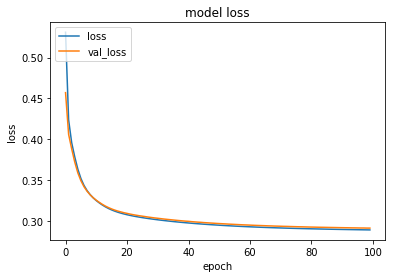

In [0]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)




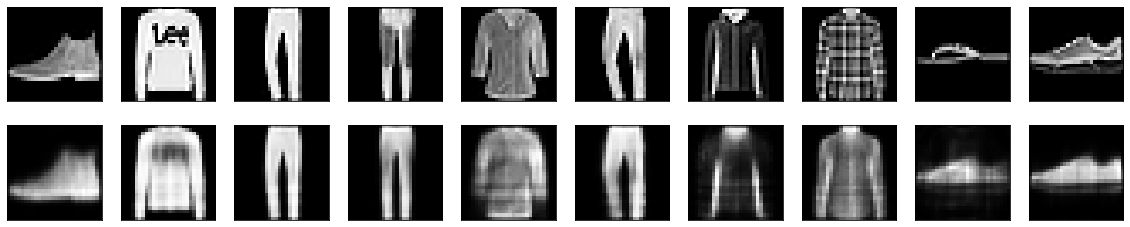

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, 1+i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, 1+i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# stacked autoencoder 

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder1 = Model(input=input_img, output=decoded)
autoencoder1.compile(optimizer='adam', loss='mse')

encoder = Model(input=input_img, output=encoded)


h1=autoencoder1.fit(X_train, X_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0486 - val_loss: 0.0262
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0231 - val_loss: 0.0211
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0199 - val_loss: 0.0192
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0185 - val_loss: 0.0178
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0174 - val_loss: 0.0168
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0165 - val_loss: 0.0162
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0158 - val_loss: 0.0155
Epoch 8/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0152 - val_loss: 0.0151
Epoch 9/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0147 - val_loss: 0.0145
Epoch

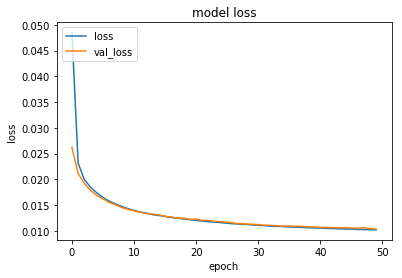

In [0]:
# summarize history for loss
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
#Plot 10 samples
predictions = autoencoder1.predict(X_test)


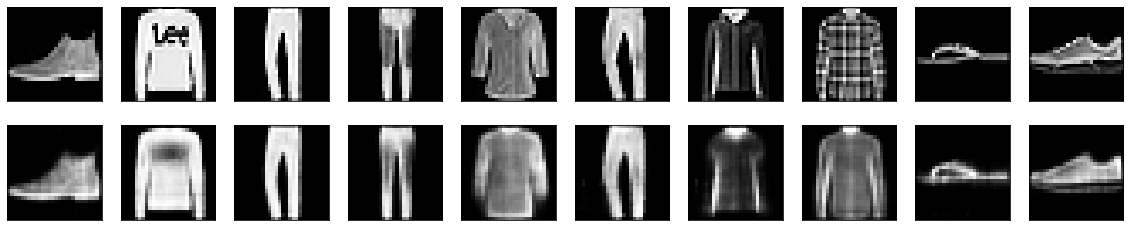

In [0]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



#Convolutional autoencoder



In [0]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(28, 28,1))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/d

In [0]:
import numpy as np
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:

h2=autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test),
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.0400 - val_loss: 0.0220
Epoch 2/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0203 - val_loss: 0.0191
Epoch 3/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0184 - val_loss: 0.0178
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0173 - val_loss: 0.0170
Epoch 5/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0166 - val_loss: 0.0164
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0160 - val_loss: 0.0159
Epoch 7/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0156 - val_loss: 0.0159
Epoch 8/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0152 - val_loss: 0.0151
Epoch 9/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0149 - val_loss: 0.0148
Epoch

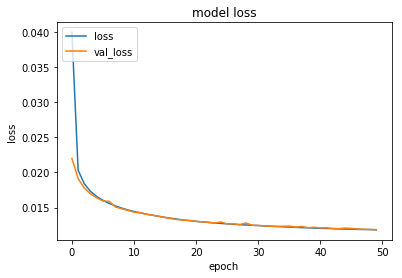

In [0]:
# summarize history for loss
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

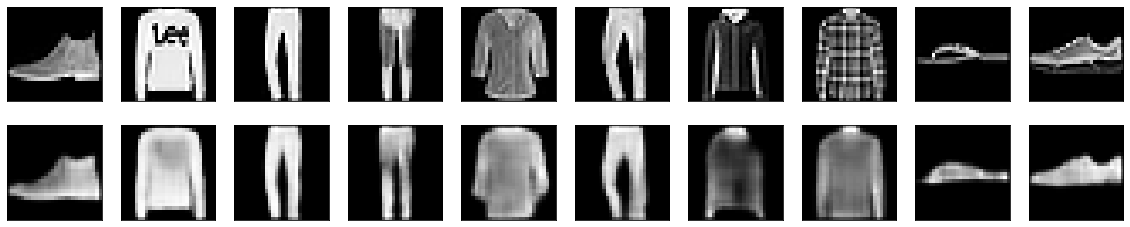

In [0]:
#plot 10 samples
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()